In [2]:
from neo4j_qna import Neo4jHandler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Neo4jHandler
handler = Neo4jHandler()

# Get the latest experiment per type per variation
df_experiments = handler.get_latest_experiment_per_type_per_variation()



/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
invalid_responses = [
    "I don't have an answer for that.",
    "Sorry, I'm not able to provide an answer to that question.[no-context]"
]


df_experiments

#df_experiments = df_experiments[df_experiments['type'] == 'lightrag']
df_experiments


,variation,question,authoritative_response,generated_response,date_time,cosine_similarity,bert_score,type
0,"When did Ted Turner launch Cable News Network,...","Cable News Network (CNN), the first channel to...",1980,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:50:58.344000000+00:00,0.058386,0.772667,graphrag
1,In which year did Ted Turner establish the aro...,"Cable News Network (CNN), the first channel to...",1980,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:50:34.419000000+00:00,0.066564,0.773294,graphrag
2,"What empire, preceding the Second and Third Re...",The Nazi regime was Germany's Third Reich; whi...,HOLY ROMAN EMPIRE,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:50:10.271000000+00:00,0.234920,0.763998,graphrag
3,The Nazi regime was Germany's Third Reich; wha...,The Nazi regime was Germany's Third Reich; whi...,HOLY ROMAN EMPIRE,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:49:43.262000000+00:00,0.197022,0.763028,graphrag
4,"Before the Second and Third Reichs, which hist...",The Nazi regime was Germany's Third Reich; whi...,HOLY ROMAN EMPIRE,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:49:18.239000000+00:00,0.237240,0.764043,graphrag
...,...,...,...,...,...,...,...,...
220,A4 paper measures 297 mm in length; how wide i...,This quiz is printed on A4 paper which has a l...,210,210,2025-03-16T22:03:43.815000000+00:00,1.000000,1.000000,prompt_injection
221,Identify the cartoon character included among ...,Who was the only fictional character to featur...,BART SIMPSON,BART SIMPSON,2025-03-16T22:03:40.308000000+00:00,1.000000,1.000000,prompt_injection
222,Who is the lone fictional individual to appear...,Who was the only fictional character to featur...,BART SIMPSON,BART SIMPSON,2025-03-16T22:03:36.914000000+00:00,1.000000,1.000000,prompt_injection
223,Which animated TV figure was the single fictio...,Who was the only fictional character to featur...,BART SIMPSON,BART SIMPSON,2025-03-16T22:03:33.419000000+00:00,1.000000,1.000000,prompt_injection


In [4]:
def compute_weighted_similarity(df, bert_weight=0.8, cosine_weight=0.2):
    """
    Computes a weighted similarity score for each item in the dataframe.

    Parameters:
    - df: pandas DataFrame with columns ['Item', 'BERTScore', 'CosineSimilarity']
    - bert_weight: weight assigned to BERTScore (default 0.8)
    - cosine_weight: weight assigned to CosineSimilarity (default 0.2)

    Returns:
    - DataFrame with an additional column 'WeightedScore'
    """
    # Validate inputs
    if not {'variation', 'bert_score', 'cosine_similarity'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'Item', 'BERTScore', and 'CosineSimilarity' columns.")
    
    if round(bert_weight + cosine_weight, 4) != 1.0:
        raise ValueError("Weights must sum to 1.0")

    df = df.copy()
    df['WeightedScore'] = (bert_weight * df['bert_score']) + (cosine_weight * df['cosine_similarity'])
    return df

In [5]:
df_experiments = compute_weighted_similarity(df_experiments)
df_experiments

,variation,question,authoritative_response,generated_response,date_time,cosine_similarity,bert_score,type,WeightedScore
0,"When did Ted Turner launch Cable News Network,...","Cable News Network (CNN), the first channel to...",1980,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:50:58.344000000+00:00,0.058386,0.772667,graphrag,0.629811
1,In which year did Ted Turner establish the aro...,"Cable News Network (CNN), the first channel to...",1980,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:50:34.419000000+00:00,0.066564,0.773294,graphrag,0.631948
2,"What empire, preceding the Second and Third Re...",The Nazi regime was Germany's Third Reich; whi...,HOLY ROMAN EMPIRE,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:50:10.271000000+00:00,0.234920,0.763998,graphrag,0.658182
3,The Nazi regime was Germany's Third Reich; wha...,The Nazi regime was Germany's Third Reich; whi...,HOLY ROMAN EMPIRE,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:49:43.262000000+00:00,0.197022,0.763028,graphrag,0.649827
4,"Before the Second and Third Reichs, which hist...",The Nazi regime was Germany's Third Reich; whi...,HOLY ROMAN EMPIRE,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:49:18.239000000+00:00,0.237240,0.764043,graphrag,0.658682
...,...,...,...,...,...,...,...,...,...
220,A4 paper measures 297 mm in length; how wide i...,This quiz is printed on A4 paper which has a l...,210,210,2025-03-16T22:03:43.815000000+00:00,1.000000,1.000000,prompt_injection,1.000000
221,Identify the cartoon character included among ...,Who was the only fictional character to featur...,BART SIMPSON,BART SIMPSON,2025-03-16T22:03:40.308000000+00:00,1.000000,1.000000,prompt_injection,1.000000
222,Who is the lone fictional individual to appear...,Who was the only fictional character to featur...,BART SIMPSON,BART SIMPSON,2025-03-16T22:03:36.914000000+00:00,1.000000,1.000000,prompt_injection,1.000000
223,Which animated TV figure was the single fictio...,Who was the only fictional character to featur...,BART SIMPSON,BART SIMPSON,2025-03-16T22:03:33.419000000+00:00,1.000000,1.000000,prompt_injection,1.000000


In [6]:
grouped = df_experiments.groupby('type')['cosine_similarity'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'mean_score', 'std': 'std_dev_score'}, inplace=True)

grouped

,type,mean_score,std_dev_score
0,graphrag,0.127817,0.081323
1,lightrag,0.810773,0.358752
2,prompt_injection,0.466667,0.502247


In [7]:

# Merge the grouped statistics back into the original DataFrame
df_with_stats = pd.merge(df_experiments, grouped, on='type')

# Calculate the threshold for 2 standard deviations below the mean for each type
df_with_stats['threshold'] = df_with_stats['mean_score'] -  df_with_stats['std_dev_score']

# Filter rows where 'weighted_score' is below the threshold for each type
df_below_2std = df_with_stats[df_with_stats['WeightedScore'] < df_with_stats['threshold']]

# Select the required columns: 'type', 'question', 'variation', 'authoritative_response', 'generated_response'
df_filtered = df_below_2std[['type', 'question', 'variation', 'authoritative_response', 'generated_response']]

# Display the resulting DataFrame
print(df_filtered)

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv("below_2std_responses_by_type.csv", index=False)

Empty DataFrame
Columns: [type, question, variation, authoritative_response, generated_response]
Index: []


/tmp/ipykernel_835/1318607569.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


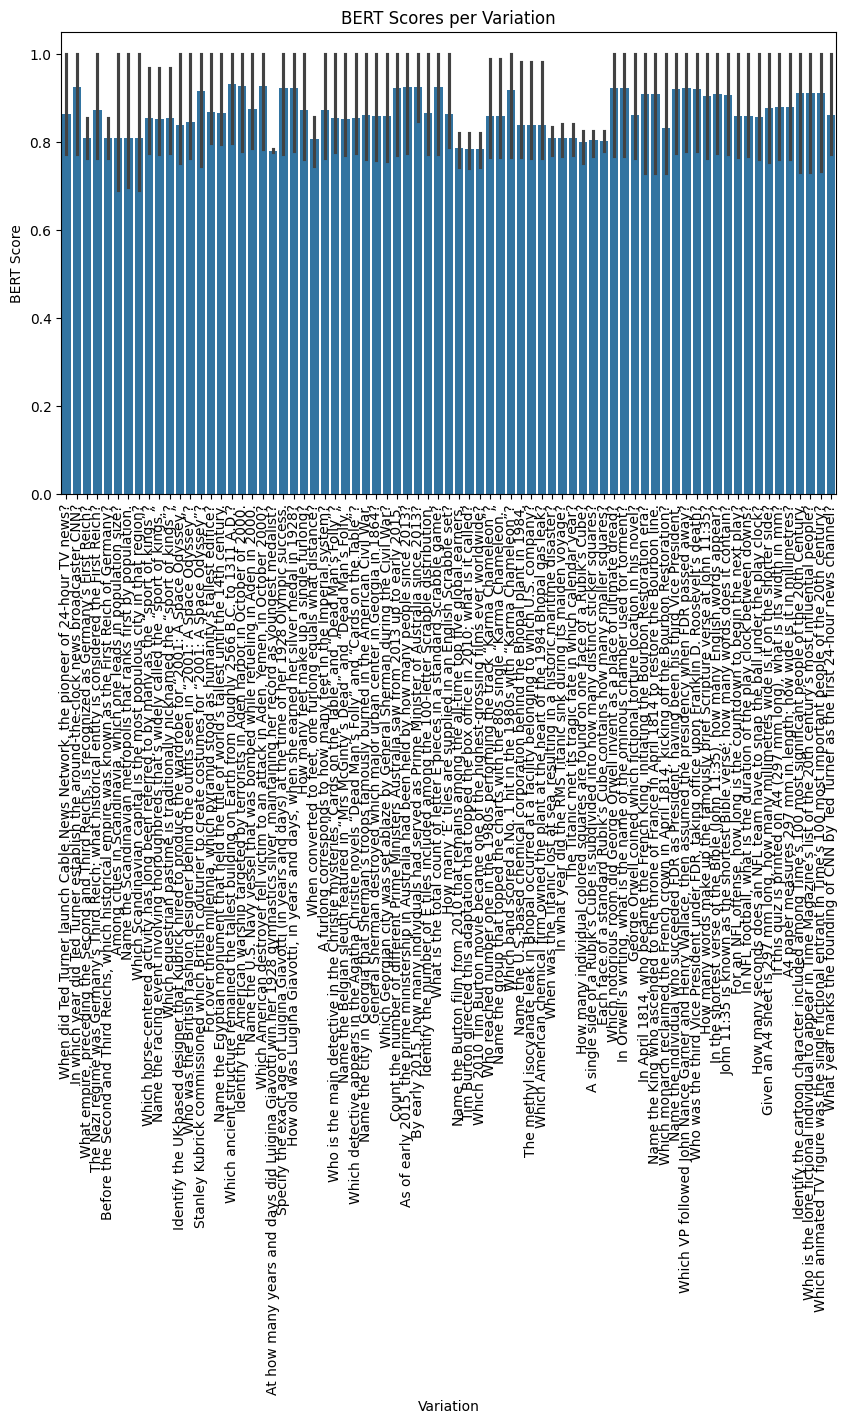

/tmp/ipykernel_835/1318607569.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


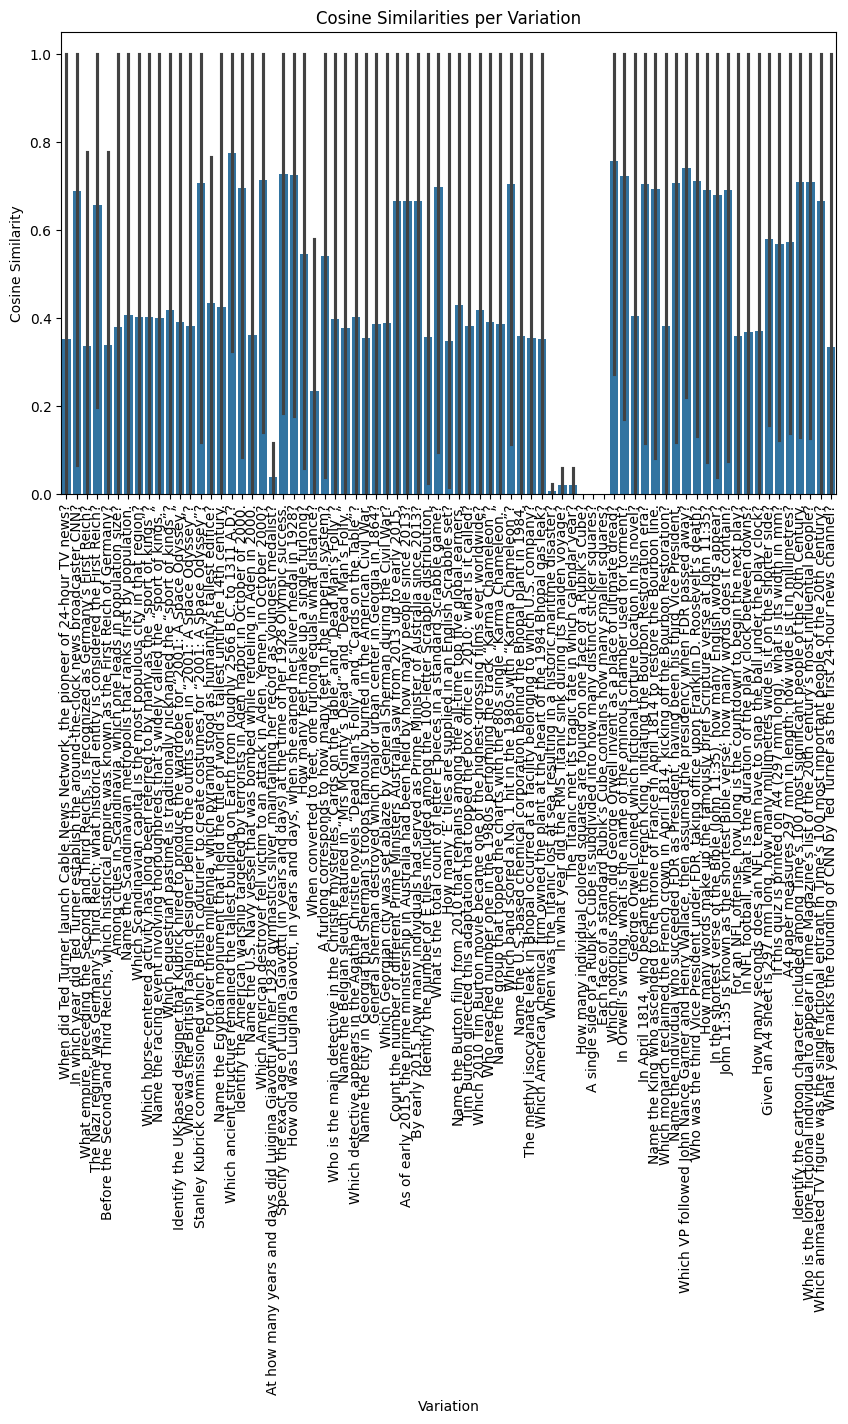

In [8]:
# Print the resulting DataFrame

df_experiments

# Visualization: BERT Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='variation', y='bert_score', data=df_experiments)
plt.xticks(rotation=90)
plt.title('BERT Scores per Variation')
plt.xlabel('Variation')
plt.ylabel('BERT Score')
plt.tight_layout()
plt.show()

# Visualization: Cosine Similarities
plt.figure(figsize=(10, 6))
sns.barplot(x='variation', y='cosine_similarity', data=df_experiments)
plt.xticks(rotation=90)
plt.title('Cosine Similarities per Variation')
plt.xlabel('Variation')
plt.ylabel('Cosine Similarity')
plt.tight_layout()
plt.show()

# Close the handler




In [1]:


df_grouped = df_experiments.groupby('question').agg({
    'bert_score': 'mean',
    'cosine_similarity': 'mean'
}).reset_index()

# Print the grouped DataFrame
print(df_grouped)

# Visualization: BERT Scores per Question
plt.figure(figsize=(10, 6))
sns.barplot(x='question', y='bert_score', data=df_grouped)
plt.xticks(rotation=90)
plt.title('Average BERT Scores per Question')
plt.xlabel('Question')
plt.ylabel('Average BERT Score')
plt.tight_layout()
plt.show()

# Visualization: Cosine Similarities per Question
plt.figure(figsize=(10, 6))
sns.barplot(x='question', y='cosine_similarity', data=df_grouped)
plt.xticks(rotation=90)
plt.title('Average Cosine Similarities per Question')
plt.xlabel('Question')
plt.ylabel('Average Cosine Similarity')
plt.tight_layout()
plt.show()

NameError: name 'df_experiments' is not defined

In [ ]:
specific_question = "How many feet are in a furlong?"
df_filtered = df_experiments[df_experiments['question'] == specific_question]
df_filtered

,variation,question,authoritative_response,generated_response,date_time,cosine_similarity,bert_score,type,WeightedScore
23,How many feet make up a single furlong?,How many feet are in a furlong?,660,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:42:44.622000000+00:00,0.057997,0.761474,graphrag,0.620778
24,"When converted to feet, one furlong equals wha...",How many feet are in a furlong?,660,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:42:24.989000000+00:00,0.120736,0.745753,graphrag,0.620749
25,A furlong corresponds to how many feet in the ...,How many feet are in a furlong?,660,"INFO: Vector Store Args: {\n ""default_vecto...",2025-03-24T04:42:04.237000000+00:00,0.039437,0.763245,graphrag,0.618483
98,How many feet make up a single furlong?,How many feet are in a furlong?,660,660 feet.,2025-03-18T04:10:55.723000000+00:00,0.579739,0.857797,lightrag,0.802185
99,"When converted to feet, one furlong equals wha...",How many feet are in a furlong?,660,660 feet.,2025-03-18T04:10:50.839000000+00:00,0.579739,0.857797,lightrag,0.802185
100,A furlong corresponds to how many feet in the ...,How many feet are in a furlong?,660,660 feet.,2025-03-18T04:10:45.153000000+00:00,0.579739,0.857797,lightrag,0.802185
173,How many feet make up a single furlong?,How many feet are in a furlong?,660,660,2025-03-16T22:06:51.975000000+00:00,1.000000,1.000000,prompt_injection,1.000000
174,"When converted to feet, one furlong equals wha...",How many feet are in a furlong?,660,I don't have an answer for that.,2025-03-16T22:06:48.521000000+00:00,0.000000,0.818529,prompt_injection,0.654823
175,A furlong corresponds to how many feet in the ...,How many feet are in a furlong?,660,660,2025-03-16T22:06:44.347000000+00:00,1.000000,1.000000,prompt_injection,1.000000


/tmp/ipykernel_74149/974591512.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


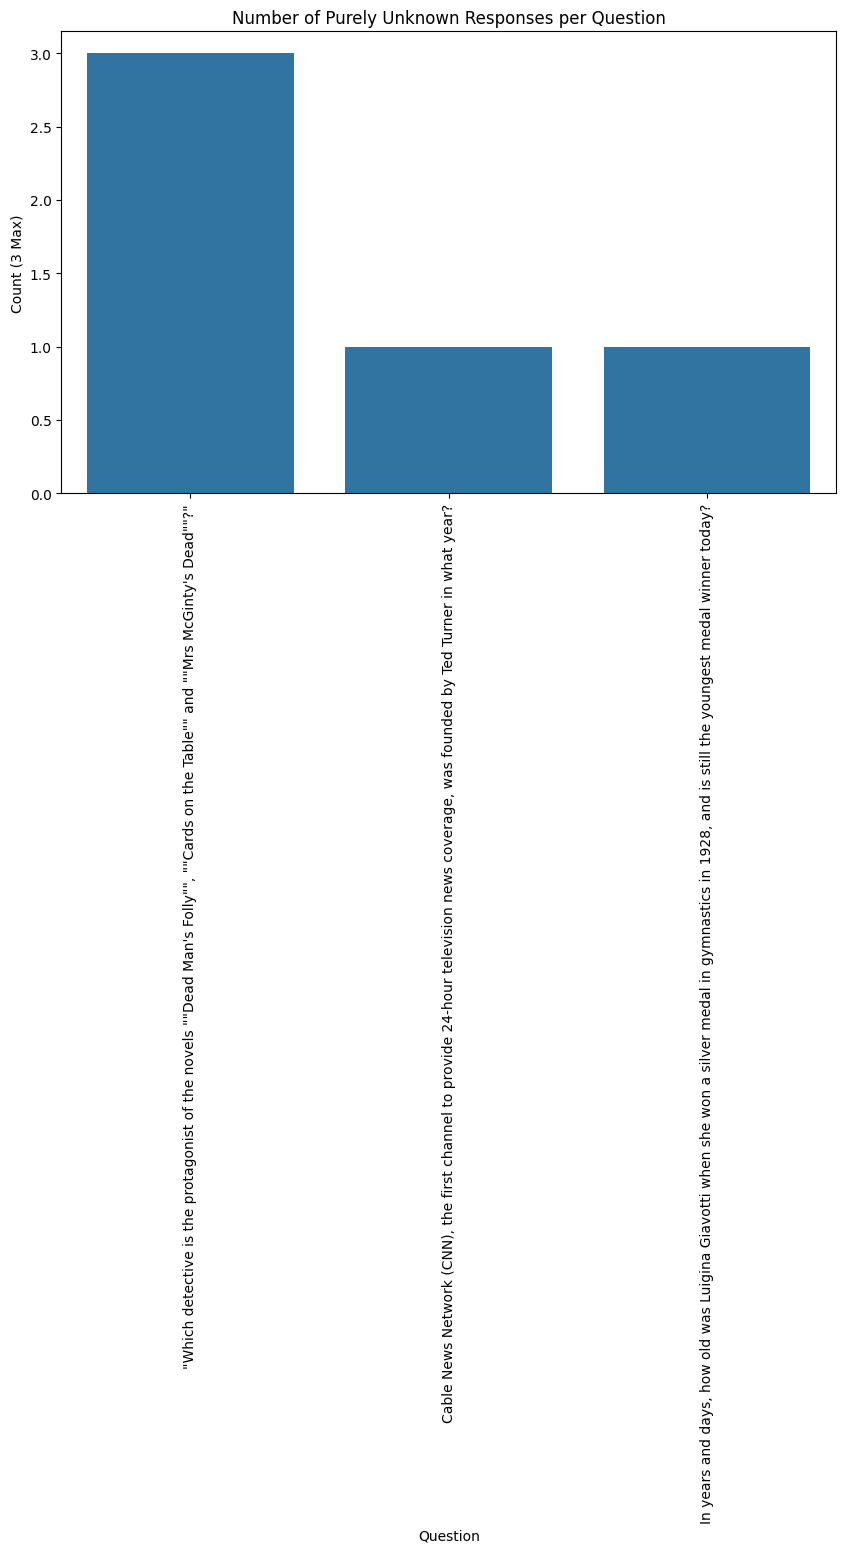

In [ ]:
specific_response = "I don't have an answer for that."
specific_response = "Sorry, I'm not able to provide an answer to that question.[no-context]"
df_filtered_response = df_experiments[df_experiments['generated_response'] == specific_response]

# Group by question and count the occurrences of the specific response
df_response_count = df_filtered_response.groupby('question').size().reset_index(name='count')

# Print the grouped DataFrame
df_response_count

# Visualization: Number of "I don't have an answer for that." responses per Question
plt.figure(figsize=(10, 6))
sns.barplot(x='question', y='count', data=df_response_count)
plt.xticks(rotation=90)
plt.title('Number of Purely Unknown Responses per Question')
plt.xlabel('Question')
plt.ylabel('Count (3 Max)')
plt.tight_layout()
plt.show()


In [ ]:

df_response_count.to_csv('response_count.csv', index=False)


,question,bert_score_mean,bert_score_median,bert_score_mode,cosine_similarity_mean,cosine_similarity_median,cosine_similarity_mode
0,"""Which detective is the protagonist of the nov...",0.774050,0.774623,0.770310,0.177964,0.194958,0.134444
1,"As at early 2015, how many Prime Ministers hav...",0.773715,0.774162,0.771169,0.000000,0.000000,0.000000
2,"Cable News Network (CNN), the first channel to...",0.772585,0.772667,0.771793,0.041650,0.058386,0.000000
3,From around 2566 B.C. to 1311 A.D. what was th...,0.796459,0.796632,0.794633,0.299440,0.300464,0.273365
4,How long do NFL football teams have to get a p...,0.765480,0.766954,0.761440,0.100079,0.106058,0.079601
5,How many feet are in a furlong?,0.756824,0.761474,0.745753,0.072723,0.057997,0.039437
6,How many squares does a Rubik’s Cube have on e...,0.760178,0.760347,0.752491,0.000000,0.000000,0.000000
7,How many ‘E’ tiles are provided in a Scrabble ...,0.772348,0.772555,0.771421,0.071462,0.072427,0.046266
8,"In 1984, in Bophal, India, there was a leak of...",0.772182,0.772167,0.771683,0.066373,0.062402,0.058386
9,In April 1814 which King gained the French thr...,0.729604,0.729445,0.729142,0.115083,0.116179,0.082023


/tmp/ipykernel_74149/2330961907.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


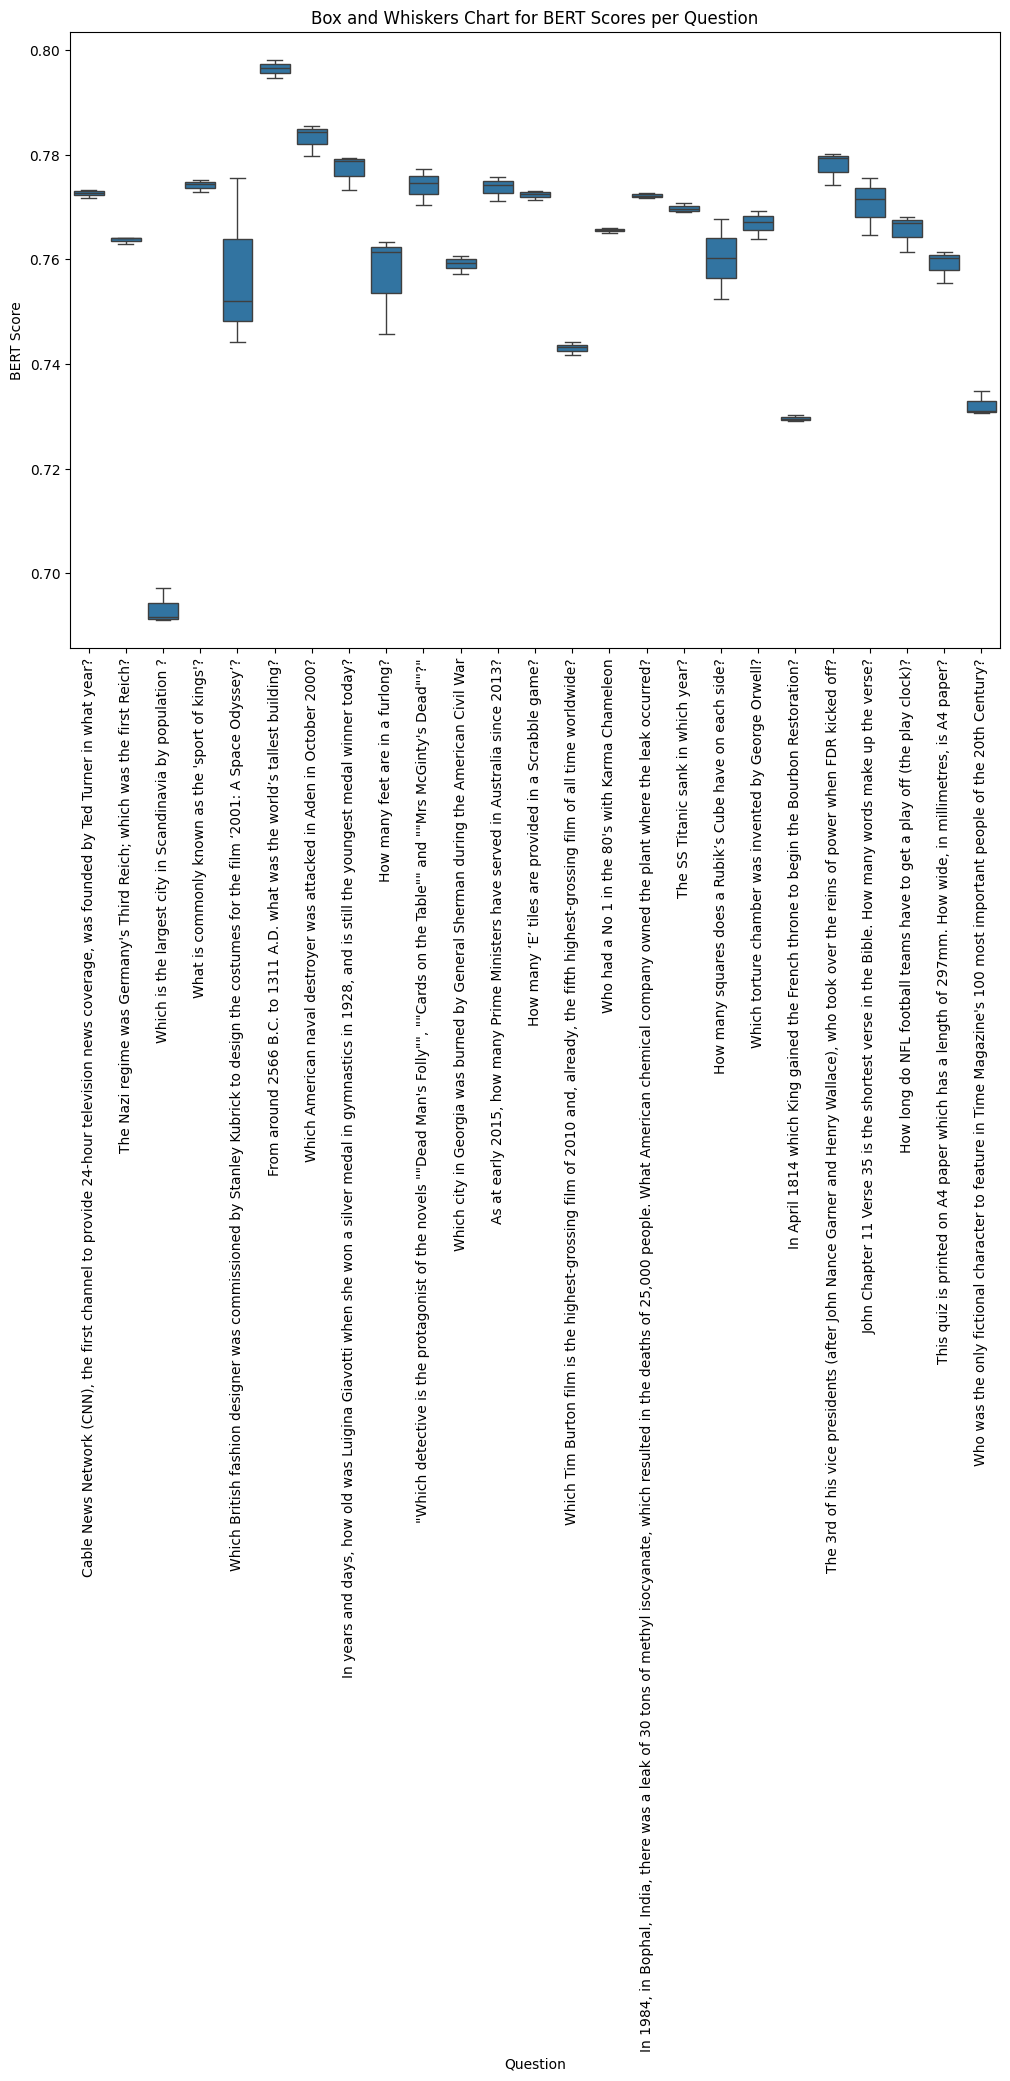

/tmp/ipykernel_74149/2330961907.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


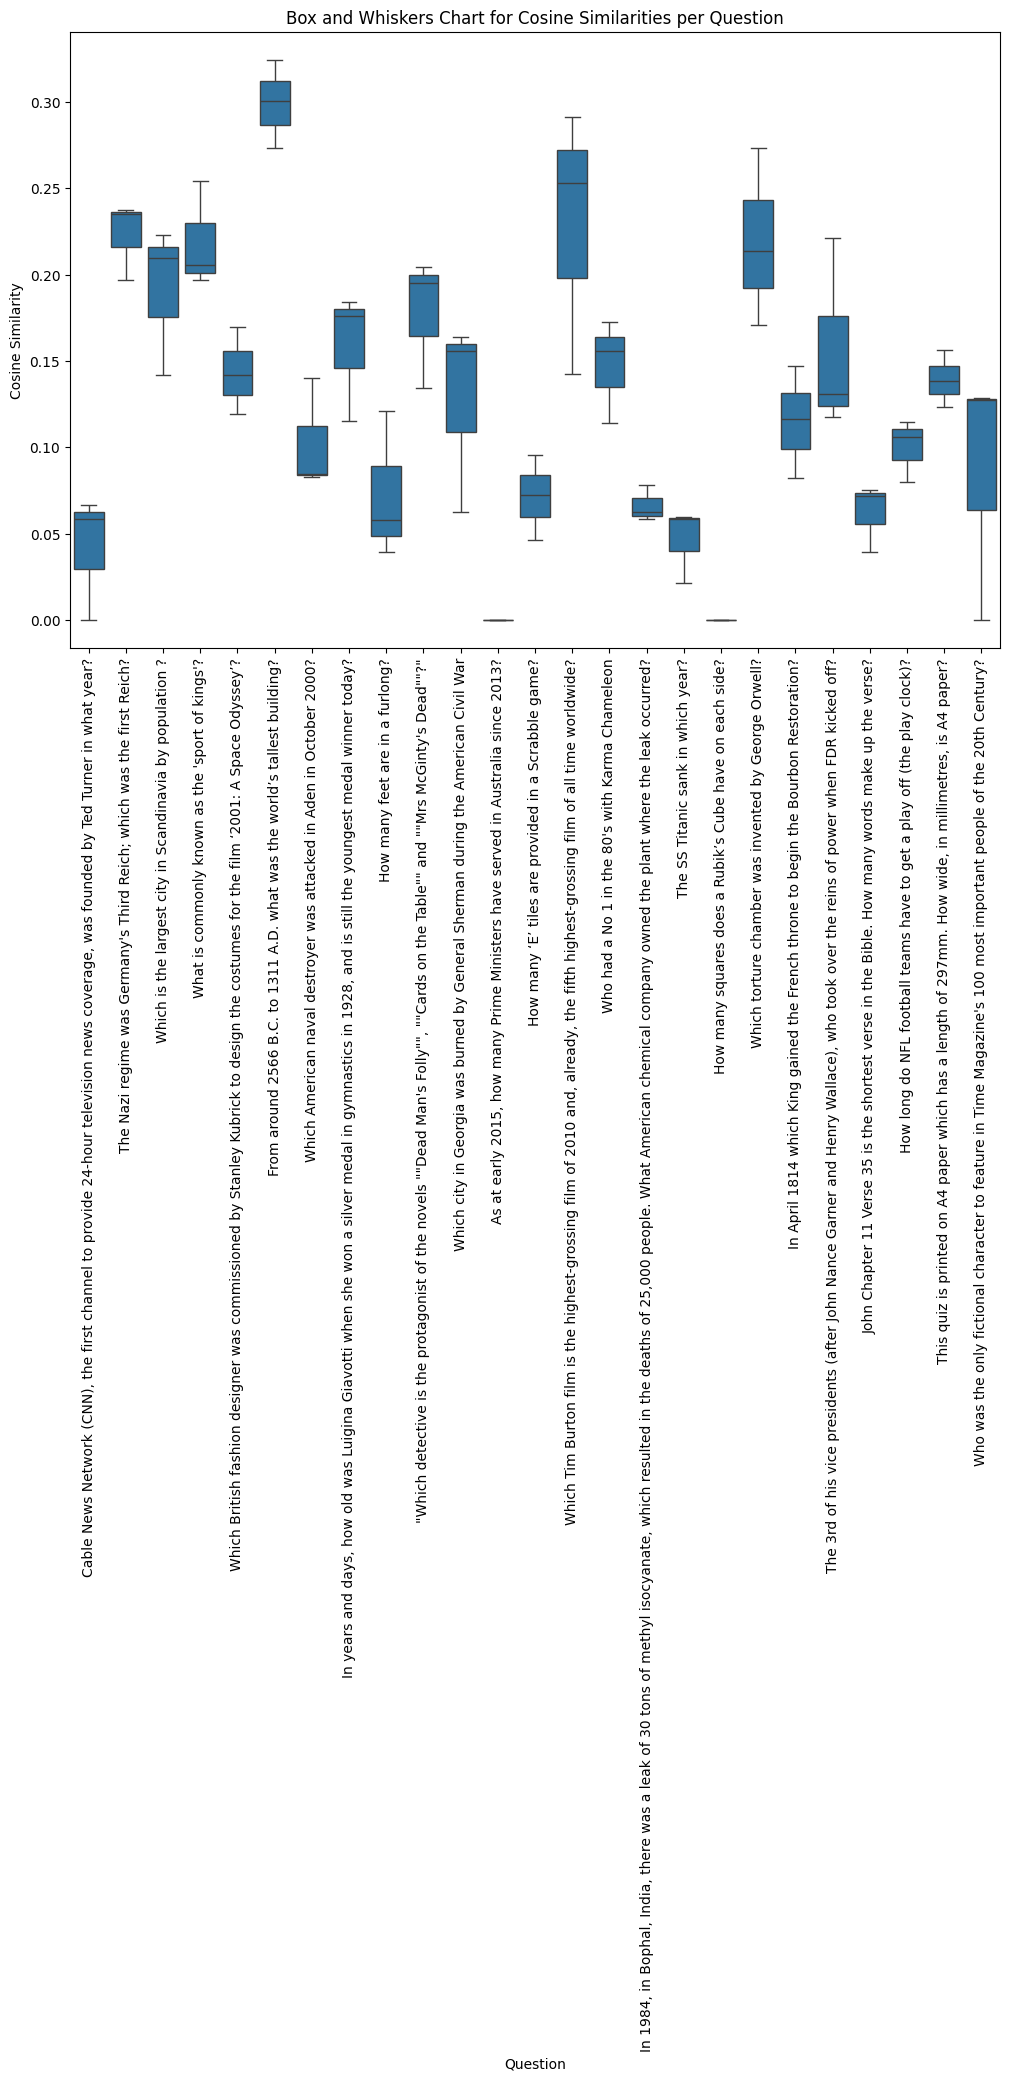

In [ ]:
specific_response = "I don't have an answer for that."
specific_response = "Sorry, I'm not able to provide an answer to that question.[no-context]"

df_filtered = df_experiments[df_experiments['generated_response'] != specific_response]
df_filtered = df_experiments[df_experiments['type'] == 'graphrag']
df_stats = df_filtered.groupby('question').agg({
    'bert_score': ['mean', 'median', lambda x: x.mode()[0]],
    'cosine_similarity': ['mean', 'median', lambda x: x.mode()[0]]
}).reset_index()

# Rename the columns for better readability
df_stats.columns = ['question', 'bert_score_mean', 'bert_score_median', 'bert_score_mode', 'cosine_similarity_mean', 'cosine_similarity_median', 'cosine_similarity_mode']

# Display the statistics DataFrame as a table
display(df_stats)

# Save the statistics DataFrame to a CSV file
df_stats.to_csv("question_stats.csv", index=False)

# Visualization: Box and Whiskers Chart for BERT Scores per Question
plt.figure(figsize=(12, 8))
sns.boxplot(x='question', y='bert_score', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Box and Whiskers Chart for BERT Scores per Question')
plt.xlabel('Question')
plt.ylabel('BERT Score')
plt.tight_layout()
plt.show()

# Visualization: Box and Whiskers Chart for Cosine Similarities per Question
plt.figure(figsize=(12, 8))
sns.boxplot(x='question', y='cosine_similarity', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Box and Whiskers Chart for Cosine Similarities per Question')
plt.xlabel('Question')
plt.ylabel('Cosine Similarity')
plt.tight_layout()
plt.show()

# Close the handler
handler.close()

In [ ]:
df_stats

,question,bert_score_mean,bert_score_median,bert_score_mode,cosine_similarity_mean,cosine_similarity_median,cosine_similarity_mode
0,"""Which detective is the protagonist of the nov...",0.774050,0.774623,0.770310,0.177964,0.194958,0.134444
1,"As at early 2015, how many Prime Ministers hav...",0.773715,0.774162,0.771169,0.000000,0.000000,0.000000
2,"Cable News Network (CNN), the first channel to...",0.772585,0.772667,0.771793,0.041650,0.058386,0.000000
3,From around 2566 B.C. to 1311 A.D. what was th...,0.796459,0.796632,0.794633,0.299440,0.300464,0.273365
4,How long do NFL football teams have to get a p...,0.765480,0.766954,0.761440,0.100079,0.106058,0.079601
5,How many feet are in a furlong?,0.756824,0.761474,0.745753,0.072723,0.057997,0.039437
6,How many squares does a Rubik’s Cube have on e...,0.760178,0.760347,0.752491,0.000000,0.000000,0.000000
7,How many ‘E’ tiles are provided in a Scrabble ...,0.772348,0.772555,0.771421,0.071462,0.072427,0.046266
8,"In 1984, in Bophal, India, there was a leak of...",0.772182,0.772167,0.771683,0.066373,0.062402,0.058386
9,In April 1814 which King gained the French thr...,0.729604,0.729445,0.729142,0.115083,0.116179,0.082023


In [ ]:
# Calculate mean for each question
df_stats = df_filtered.groupby('question').agg({
    'weighted_score': 'mean',
    'bert_score': 'mean',
    'cosine_similarity': 'mean'
}).reset_index()

# Rename the columns for better readability
df_stats.columns = [
    'question', 
    'weighted_score_mean',
    'bert_score_mean', 
    'cosine_similarity_mean'
]

# Display the statistics DataFrame as a table
df_stats = df_stats.sort_values(by='weighted_score_mean', ascending=False)
display(df_stats)

# Save the statistics DataFrame to a CSV file
df_stats.to_csv("question_stats_weighted.csv", index=False)

# Visualization: Box and Whiskers Chart for Weighted Scores per Question
plt.figure(figsize=(12, 8))
sns.boxplot(x='question', y='weighted_score', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Box and Whiskers Chart for Weighted Scores per Question')
plt.xlabel('Question')
plt.ylabel('Weighted Score')
plt.tight_layout()
plt.show()

# Close the handler

KeyError: "Column(s) ['bert_score', 'cosine_similarity', 'weighted_score'] do not exist"

In [ ]:
df_experiments
df_experiments['response_length'] = df_experiments['generated_response'].apply(len)

# Group by 'question' and 'type', then calculate the average length of the generated_response
df_avg_response_length = df_experiments.groupby(['question', 'type']).agg({
    'response_length': 'mean'
}).reset_index()

# Rename the columns for better readability
df_avg_response_length.rename(columns={'response_length': 'avg_response_length'}, inplace=True)

# Display the resulting DataFrame
print(df_avg_response_length)

# Save the DataFrame to a CSV file
df_avg_response_length.to_csv("avg_response_length_by_question_and_type.csv", index=False)

                                             question              type  \
0   "Which detective is the protagonist of the nov...          graphrag   
1   "Which detective is the protagonist of the nov...          lightrag   
2   "Which detective is the protagonist of the nov...  prompt_injection   
3   As at early 2015, how many Prime Ministers hav...          graphrag   
4   As at early 2015, how many Prime Ministers hav...          lightrag   
..                                                ...               ...   
70    Who had a No 1 in the 80's with Karma Chameleon          lightrag   
71    Who had a No 1 in the 80's with Karma Chameleon  prompt_injection   
72  Who was the only fictional character to featur...          graphrag   
73  Who was the only fictional character to featur...          lightrag   
74  Who was the only fictional character to featur...  prompt_injection   

    avg_response_length  
0           1311.000000  
1             70.000000  
2             16.0000

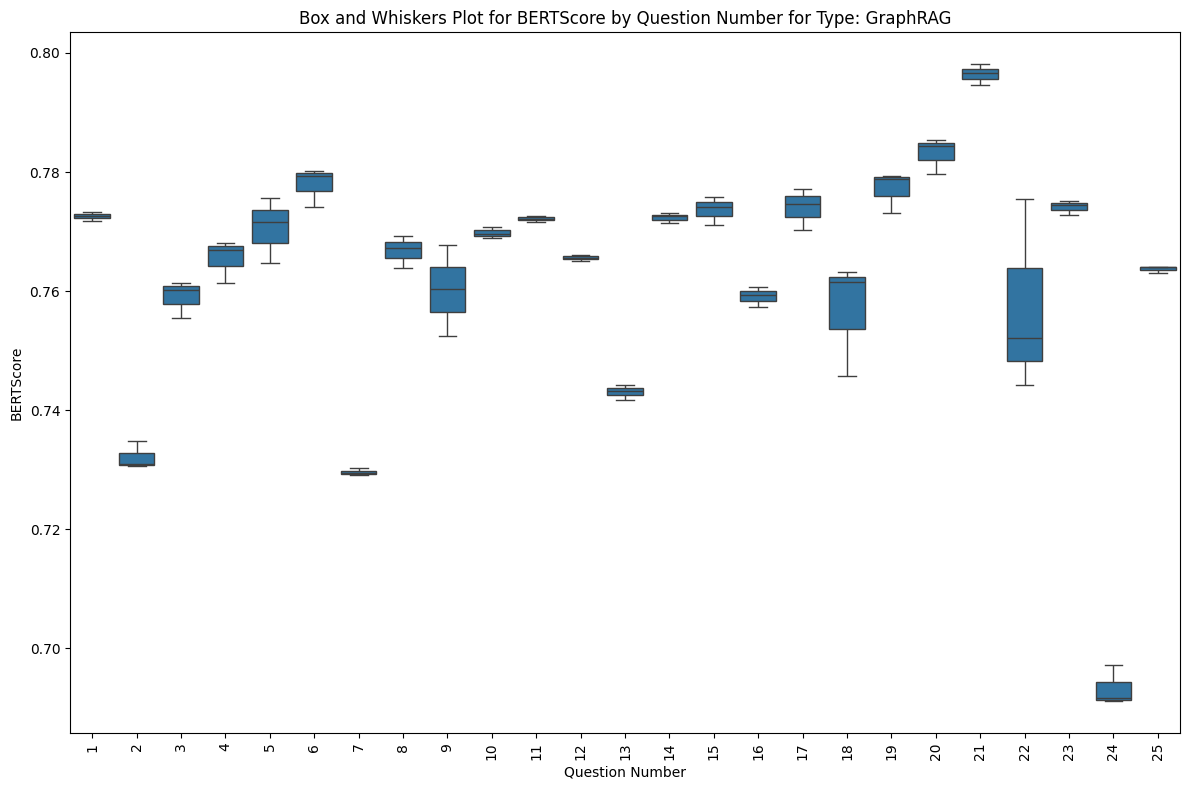

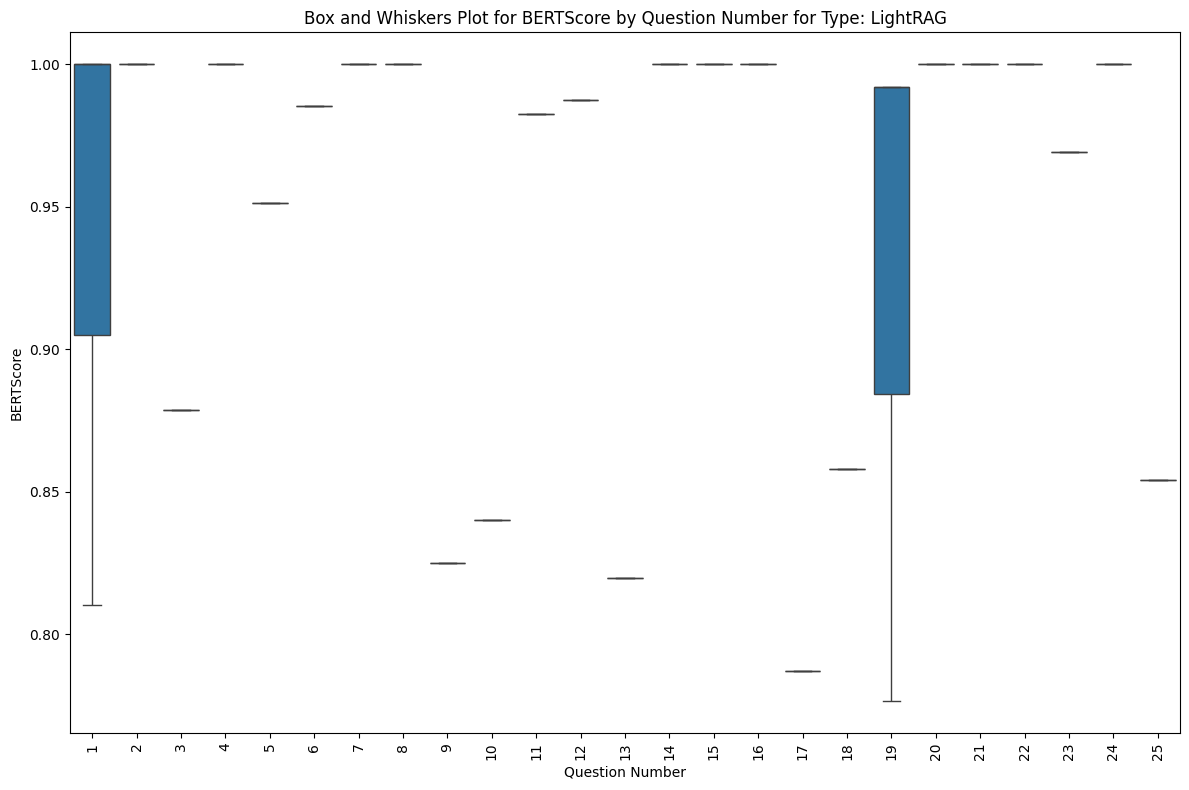

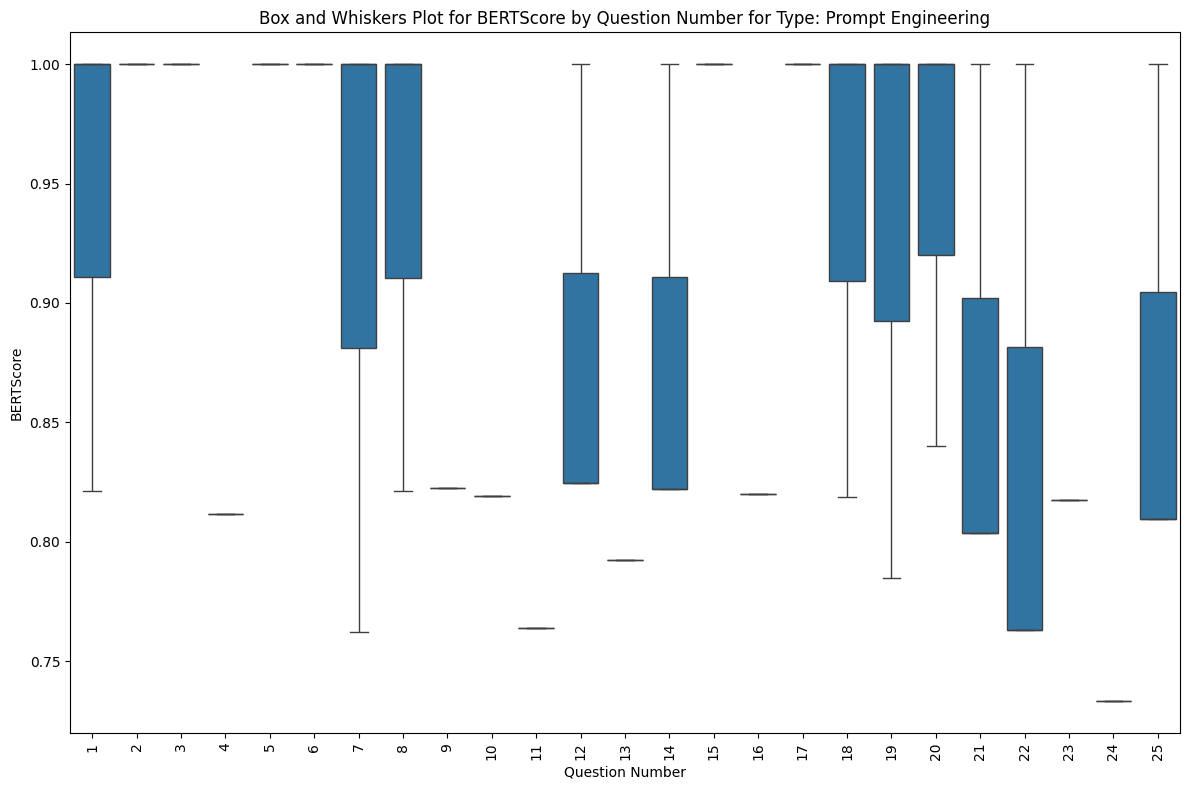

In [ ]:
# Load MastersQnA.csv to map question numbers
masters_qna = pd.read_csv("MastersQnA.csv")
question_mapping = masters_qna.set_index("Utterence")["No."].to_dict()

# Map question numbers to df_experiments
df_experiments["question_number"] = df_experiments["question"].map(question_mapping)

# Ensure the question number mapping is successful
if df_experiments["question_number"].isnull().any():
    print("Warning: Some questions could not be mapped to question numbers.")

# Replace type values with more descriptive names
type_mapping = {
    "graphrag": "GraphRAG",
    "lightrag": "LightRAG",
    "prompt_injection": "Prompt Engineering"
}
df_experiments["type"] = df_experiments["type"].replace(type_mapping)

# Filter by type
types = df_experiments["type"].unique()

# Create box and whiskers plots for each type
for t in types:
    df_type = df_experiments[df_experiments["type"] == t]

    # Visualization: Box and Whiskers Plot for BERTScore by Question Number
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="question_number", y="bert_score", data=df_type)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whiskers Plot for BERTScore by Question Number for Type: {t}")
    plt.xlabel("Question Number")
    plt.ylabel("BERTScore")
    plt.tight_layout()
    plt.savefig(f"bert_score_boxplot_by_question_{t.replace(' ', '_').lower()}.png")  # Save the plot as a PNG file
    plt.show()

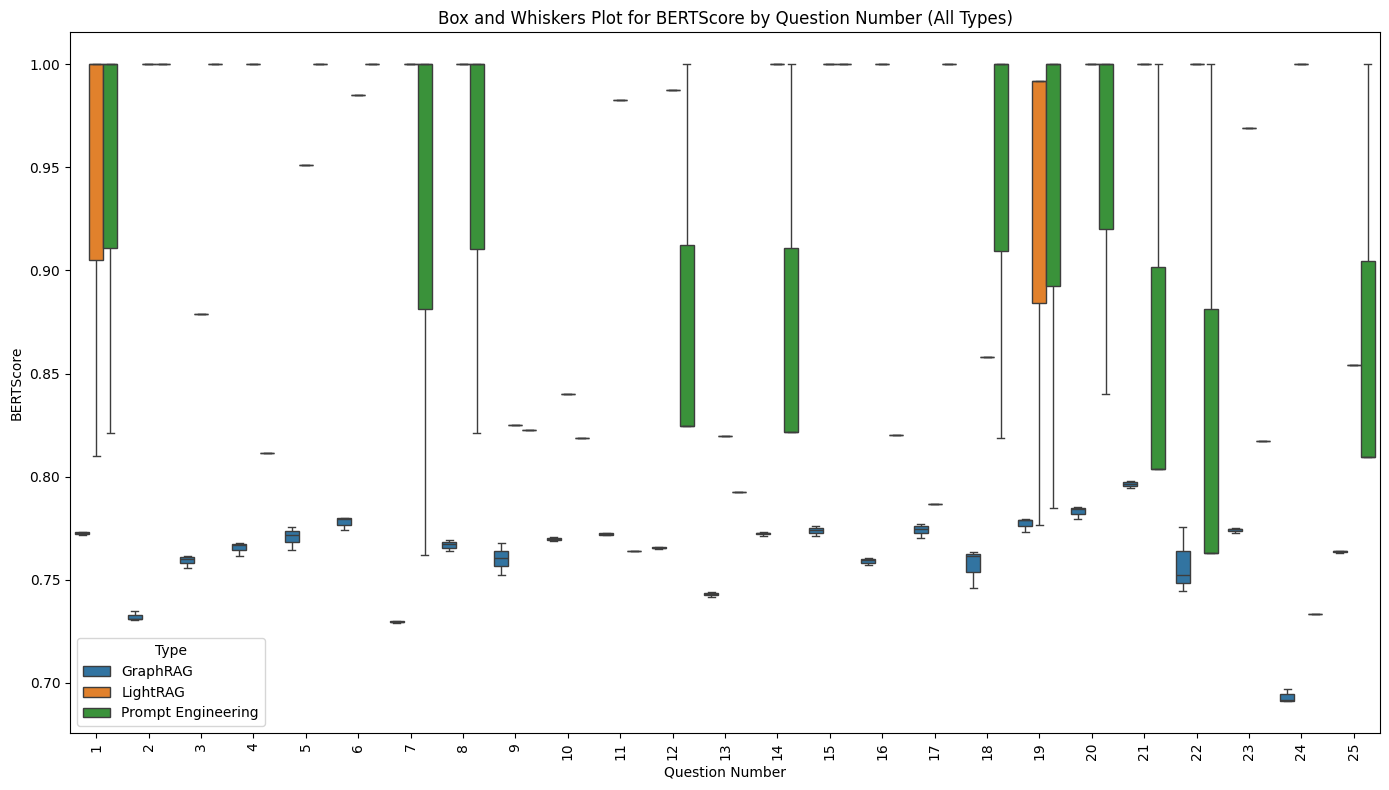

In [ ]:


# Load MastersQnA.csv to map question numbers
masters_qna = pd.read_csv("MastersQnA.csv")
question_mapping = masters_qna.set_index("Utterence")["No."].to_dict()

# Map question numbers to df_experiments
df_experiments["question_number"] = df_experiments["question"].map(question_mapping)

# Ensure the question number mapping is successful
if df_experiments["question_number"].isnull().any():
    print("Warning: Some questions could not be mapped to question numbers.")

# Replace type values with more descriptive names
type_mapping = {
    "graphrag": "GraphRAG",
    "lightrag": "LightRAG",
    "prompt_injection": "Prompt Engineering"
}
df_experiments["type"] = df_experiments["type"].replace(type_mapping)

# Combined Visualization: Box and Whiskers Plot for All Types
plt.figure(figsize=(14, 8))
sns.boxplot(x="question_number", y="bert_score", hue="type", data=df_experiments)
plt.xticks(rotation=90)
plt.title("Box and Whiskers Plot for BERTScore by Question Number (All Types)")
plt.xlabel("Question Number")
plt.ylabel("BERTScore")
plt.legend(title="Type")
plt.tight_layout()
plt.savefig("bert_score_boxplot_combined.png")  # Save the plot as a PNG file
plt.show()

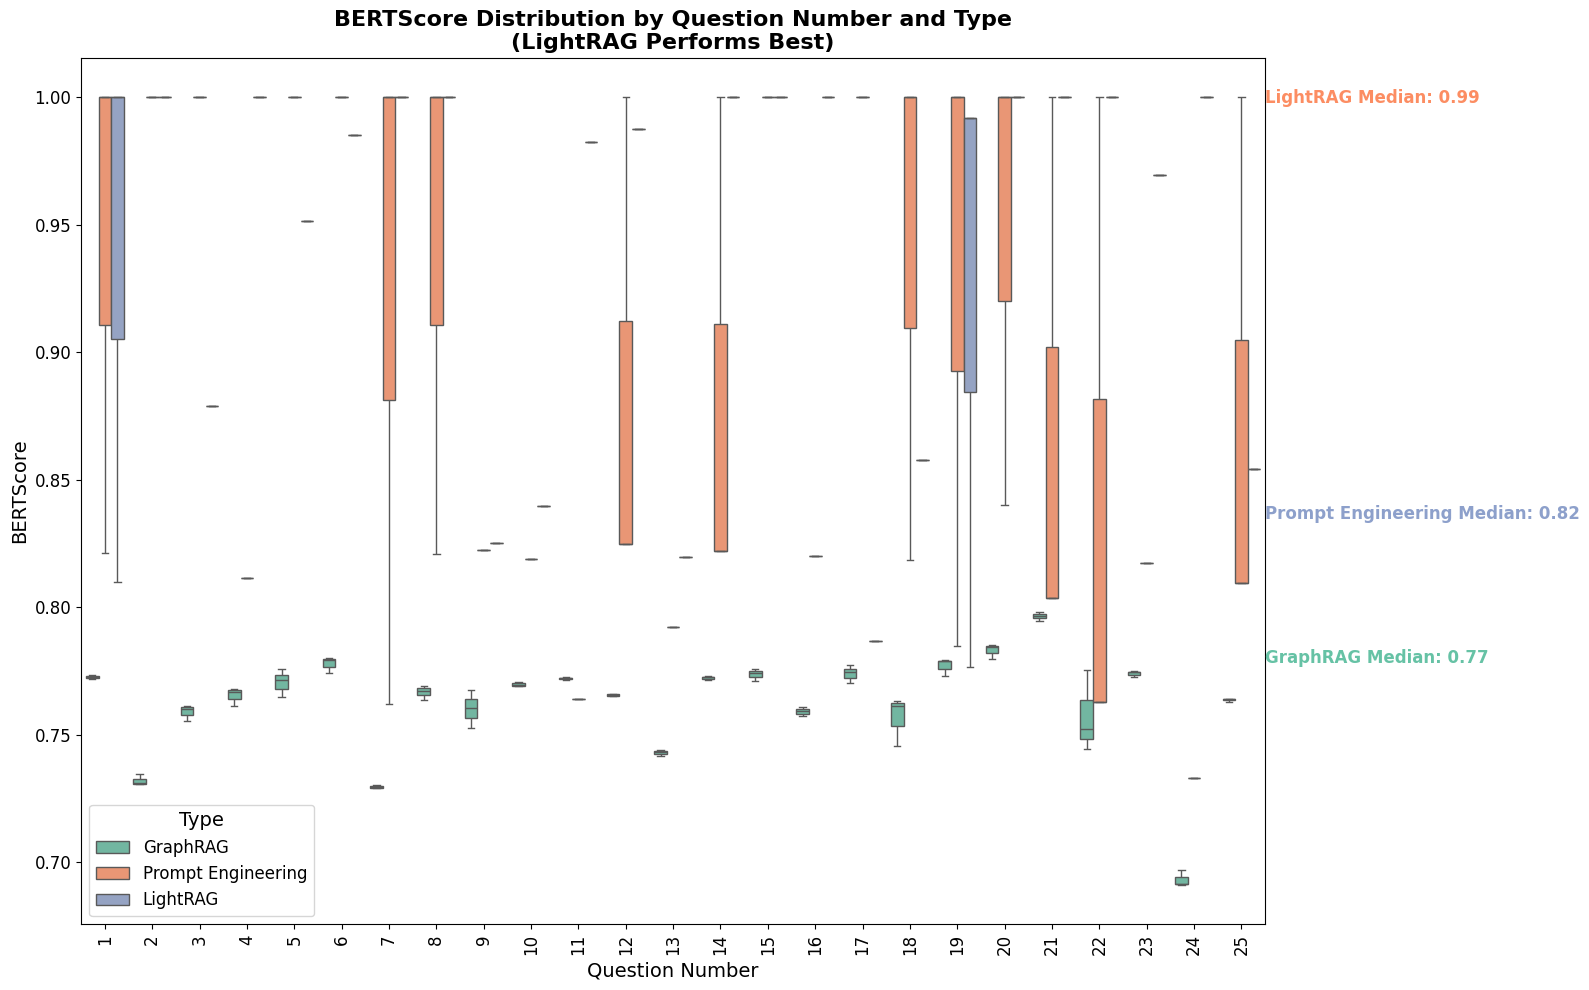

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load MastersQnA.csv to map question numbers
masters_qna = pd.read_csv("MastersQnA.csv")
question_mapping = masters_qna.set_index("Utterence")["No."].to_dict()

# Map question numbers to df_experiments
df_experiments["question_number"] = df_experiments["question"].map(question_mapping)

# Ensure the question number mapping is successful
if df_experiments["question_number"].isnull().any():
    print("Warning: Some questions could not be mapped to question numbers.")

# Replace type values with more descriptive names
type_mapping = {
    "graphrag": "GraphRAG",
    "lightrag": "LightRAG",
    "prompt_injection": "Prompt Engineering"
}
df_experiments["type"] = df_experiments["type"].replace(type_mapping)

# Sort by question number for better readability
df_experiments = df_experiments.sort_values(by="question_number")

# Combined Visualization: Box and Whiskers Plot for All Types
plt.figure(figsize=(16, 10))
sns.set_palette("Set2")  # Use a distinct color palette
sns.boxplot(x="question_number", y="bert_score", hue="type", data=df_experiments)

# Highlight the median BERTScore for each type
medians = df_experiments.groupby("type")["bert_score"].median()
for i, (type_name, median_value) in enumerate(medians.items()):
    plt.text(
        len(df_experiments["question_number"].unique()) - 0.5,  # Position near the end of the x-axis
        median_value + 0.01,  # Slightly above the median
        f"{type_name} Median: {median_value:.2f}",
        color=sns.color_palette("Set2")[i],
        fontsize=12,
        fontweight="bold"
    )

# Add title and labels
plt.title("BERTScore Distribution by Question Number and Type\n(LightRAG Performs Best)", fontsize=16, fontweight="bold")
plt.xlabel("Question Number", fontsize=14)
plt.ylabel("BERTScore", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Type", fontsize=12, title_fontsize=14)

# Save and show the plot
plt.tight_layout()
plt.savefig("bert_score_boxplot_combined_highlighted.png")
plt.show()

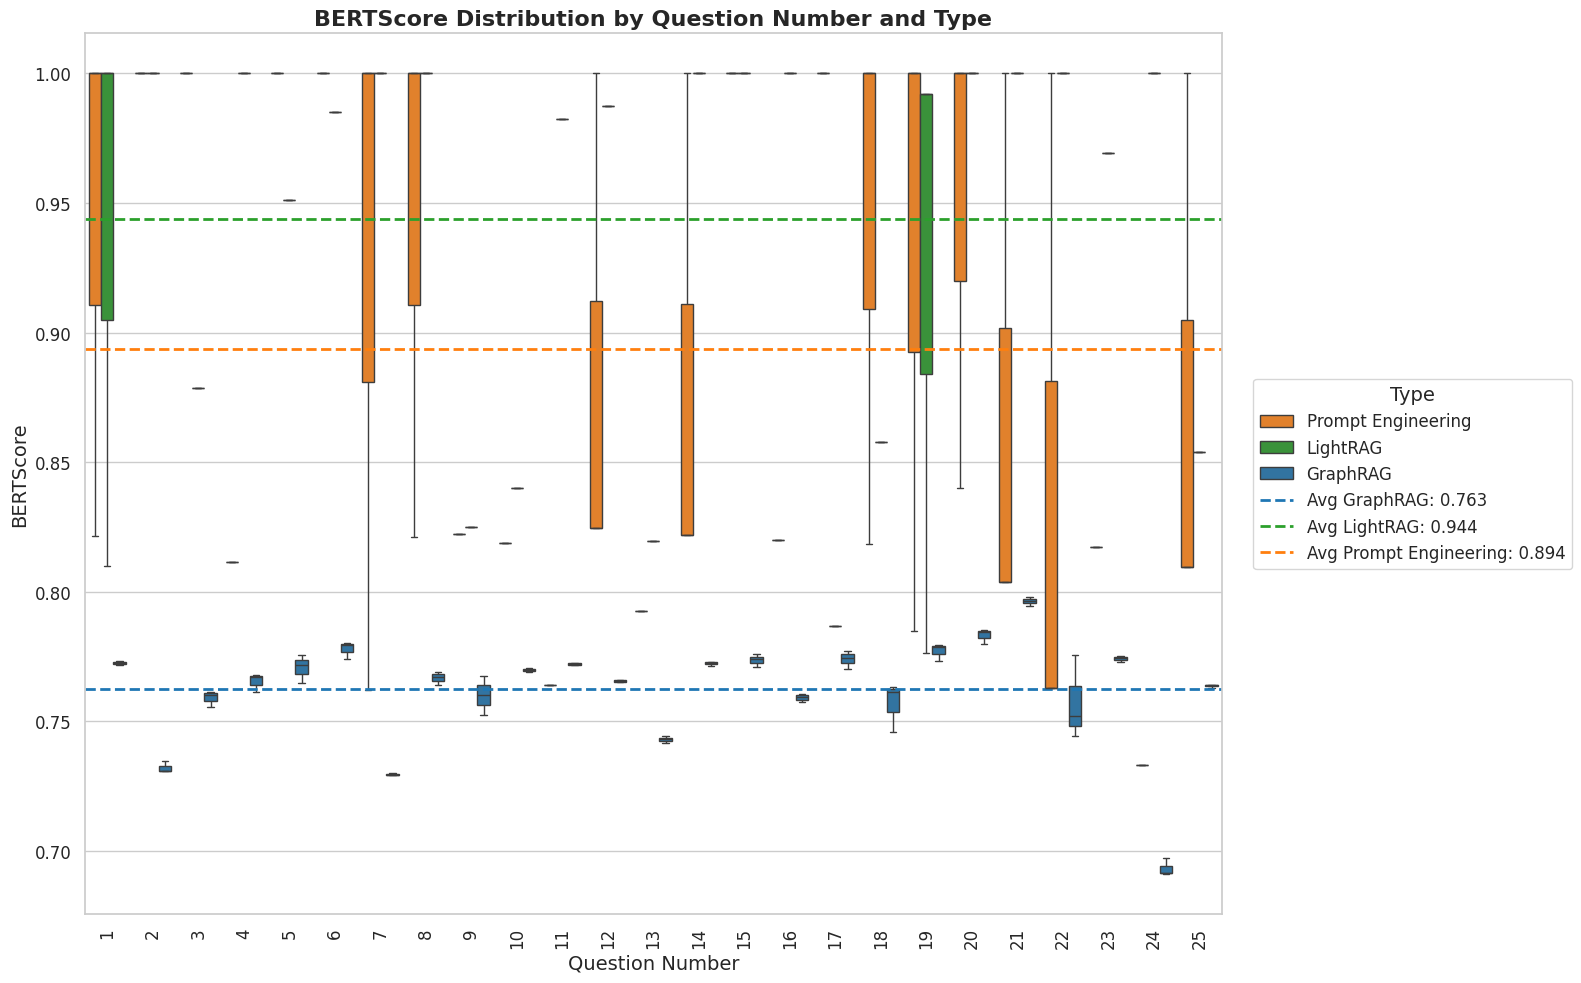

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load MastersQnA.csv to map question numbers
masters_qna = pd.read_csv("MastersQnA.csv")
question_mapping = masters_qna.set_index("Utterence")["No."].to_dict()

# Map question numbers to df_experiments
df_experiments["question_number"] = df_experiments["question"].map(question_mapping)

# Ensure the question number mapping is successful
if df_experiments["question_number"].isnull().any():
    print("Warning: Some questions could not be mapped to question numbers.")

# Replace type values with more descriptive names
type_mapping = {
    "graphrag": "GraphRAG",
    "lightrag": "LightRAG",
    "prompt_injection": "Prompt Engineering"
}
df_experiments["type"] = df_experiments["type"].replace(type_mapping)

# Sort by question number for better readability
df_experiments = df_experiments.sort_values(by="question_number")

# Calculate average BERTScore for each type
average_scores = df_experiments.groupby("type")["bert_score"].mean()

# Define a consistent color palette for the types
palette = {
    "GraphRAG": "#1f77b4",          # Blue
    "LightRAG": "#2ca02c",          # Green
    "Prompt Engineering": "#ff7f0e" # Orange
}

# Combined Visualization: Box and Whiskers Plot for All Types
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plot the boxplot with defined palette
ax = sns.boxplot(
    x="question_number",
    y="bert_score",
    hue="type",
    data=df_experiments,
    palette=palette
)

# Add horizontal lines for average BERTScores by method
for type_name, avg_score in average_scores.items():
    ax.axhline(
        y=avg_score,
        color=palette[type_name],
        linestyle="--",
        linewidth=2,
        label=f"Avg {type_name}: {avg_score:.3f}"
    )

# Add title and labels
plt.title("BERTScore Distribution by Question Number and Type", fontsize=16, fontweight="bold")
plt.xlabel("Question Number", fontsize=14)
plt.ylabel("BERTScore", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend position
plt.legend(
    title="Type",
    fontsize=12,
    title_fontsize=14,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

# Save and show the plot
plt.tight_layout()
plt.savefig("bert_score_boxplot_combined_with_averages.png", dpi=300)
plt.show()

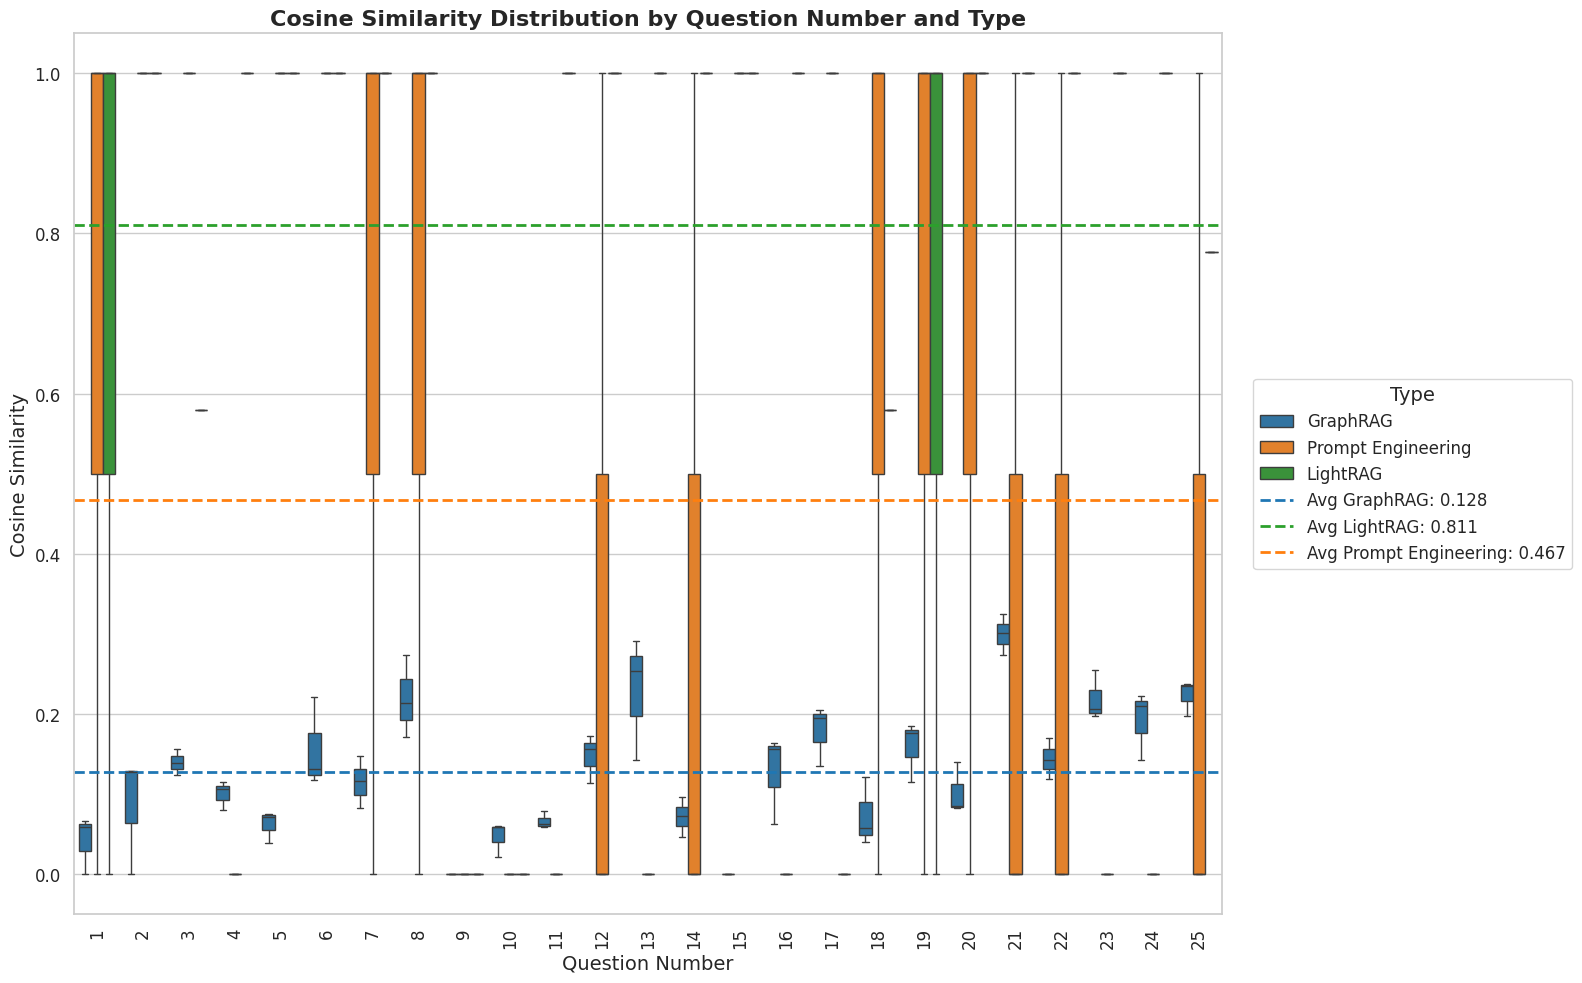

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load MastersQnA.csv to map question numbers
masters_qna = pd.read_csv("MastersQnA.csv")
question_mapping = masters_qna.set_index("Utterence")["No."].to_dict()

# Map question numbers to df_experiments
df_experiments["question_number"] = df_experiments["question"].map(question_mapping)

# Ensure the question number mapping is successful
if df_experiments["question_number"].isnull().any():
    print("Warning: Some questions could not be mapped to question numbers.")

# Replace type values with more descriptive names
type_mapping = {
    "graphrag": "GraphRAG",
    "lightrag": "LightRAG",
    "prompt_injection": "Prompt Engineering"
}
df_experiments["type"] = df_experiments["type"].replace(type_mapping)

# Sort by question number for better readability
df_experiments = df_experiments.sort_values(by="question_number")

# Calculate average BERTScore for each type
average_scores = df_experiments.groupby("type")["cosine_similarity"].mean()

# Define a consistent color palette for the types
palette = {
    "GraphRAG": "#1f77b4",          # Blue
    "LightRAG": "#2ca02c",          # Green
    "Prompt Engineering": "#ff7f0e" # Orange
}

# Combined Visualization: Box and Whiskers Plot for All Types
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plot the boxplot with defined palette
ax = sns.boxplot(
    x="question_number",
    y="cosine_similarity",
    hue="type",
    data=df_experiments,
    palette=palette
)

# Add horizontal lines for average BERTScores by method
for type_name, avg_score in average_scores.items():
    ax.axhline(
        y=avg_score,
        color=palette[type_name],
        linestyle="--",
        linewidth=2,
        label=f"Avg {type_name}: {avg_score:.3f}"
    )

# Add title and labels
plt.title("Cosine Similarity Distribution by Question Number and Type", fontsize=16, fontweight="bold")
plt.xlabel("Question Number", fontsize=14)
plt.ylabel("Cosine Similarity", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend position
plt.legend(
    title="Type",
    fontsize=12,
    title_fontsize=14,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

# Save and show the plot
plt.tight_layout()
plt.savefig("bert_score_boxplot_combined_with_averages.png", dpi=300)
plt.show()

In [ ]:
handler.close()